In [1]:
import pandas as pd
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model, MultiprocessingEvaluator, SequentialEvaluator, ema_logging,
                           perform_experiments, Policy, Scenario)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
from ema_workbench import Constraint
import seaborn as sns


In [ ]:
ema_logging.log_to_stderr(ema_logging.INFO)

model, functions = get_model_for_problem_formulation(2)
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=10,               #500
                                            policies=2,
                                            uncertainty_sampling='lhs')

In [8]:
experiments = results[0]
outcomes = pd.DataFrame(results[1])
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,Minimum water level full network
0,5.623109e+08,5.531386e+08,1.105000e+09,38274.393862,0.051378,5.377057
1,9.400993e+06,5.531386e+08,1.105000e+09,775.477620,0.002761,4.418500
2,9.341327e+06,5.531386e+08,1.105000e+09,786.516344,0.002656,4.418500
3,5.157736e+07,5.531386e+08,1.105000e+09,4201.966375,0.010137,4.418500
4,5.409506e+06,5.531386e+08,1.105000e+09,481.222261,0.000726,4.418500
5,1.308903e+07,5.531386e+08,1.105000e+09,1116.619503,0.000694,4.418476
6,1.137005e+08,5.531386e+08,1.105000e+09,8872.029814,0.012625,4.418500
7,3.218323e+07,5.531386e+08,1.105000e+09,3016.929478,0.003330,4.980357
8,5.126281e+06,5.531386e+08,1.105000e+09,240.653573,0.000456,4.418500
9,2.601347e+07,5.531386e+08,1.105000e+09,1647.808491,0.002880,4.418500


In [9]:
data = pd.concat([experiments, outcomes], 1)
data

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,EWS_DaysToThreat,scenario,policy,model,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,Minimum water level full network
0,82.0,258.075922,1.0,0.008403,305.005060,1.5,0.975470,83.886913,10,0.582615,...,4.0,0,0,dikesnet,5.623109e+08,5.531386e+08,1.105000e+09,38274.393862,0.051378,5.377057
1,5.0,338.817031,10,0.822221,243.705861,1.0,0.883680,320.874105,1.5,0.161137,...,4.0,1,0,dikesnet,9.400993e+06,5.531386e+08,1.105000e+09,775.477620,0.002761,4.418500
2,67.0,204.357937,10,0.543086,43.124113,1.5,0.608873,56.242214,1.5,0.275219,...,4.0,2,0,dikesnet,9.341327e+06,5.531386e+08,1.105000e+09,786.516344,0.002656,4.418500
3,57.0,79.563184,1.0,0.492207,105.185369,1.0,0.323235,105.213548,10,0.087792,...,4.0,3,0,dikesnet,5.157736e+07,5.531386e+08,1.105000e+09,4201.966375,0.010137,4.418500
4,100.0,119.048857,1.5,0.955283,80.737842,1.5,0.541079,306.927219,10,0.740481,...,4.0,4,0,dikesnet,5.409506e+06,5.531386e+08,1.105000e+09,481.222261,0.000726,4.418500
5,132.0,143.536130,1.5,0.692804,257.155386,1.5,0.476413,170.300835,1.0,0.948645,...,4.0,5,0,dikesnet,1.308903e+07,5.531386e+08,1.105000e+09,1116.619503,0.000694,4.418476
6,47.0,310.696769,10,0.158555,167.986302,10,0.254113,270.277988,1.0,0.650414,...,4.0,6,0,dikesnet,1.137005e+08,5.531386e+08,1.105000e+09,8872.029814,0.012625,4.418500
7,119.0,50.010947,1.0,0.255955,331.146622,10,0.784819,142.160280,1.5,0.301195,...,4.0,7,0,dikesnet,3.218323e+07,5.531386e+08,1.105000e+09,3016.929478,0.003330,4.980357
8,26.0,171.685207,1.0,0.334956,190.344126,1.0,0.159176,246.218142,10,0.428323,...,4.0,8,0,dikesnet,5.126281e+06,5.531386e+08,1.105000e+09,240.653573,0.000456,4.418500
9,22.0,250.218071,1.5,0.716356,145.391989,10,0.040395,201.014893,1.0,0.854782,...,4.0,9,0,dikesnet,2.601347e+07,5.531386e+08,1.105000e+09,1647.808491,0.002880,4.418500


[MainProcess/INFO] no time dimension found in results


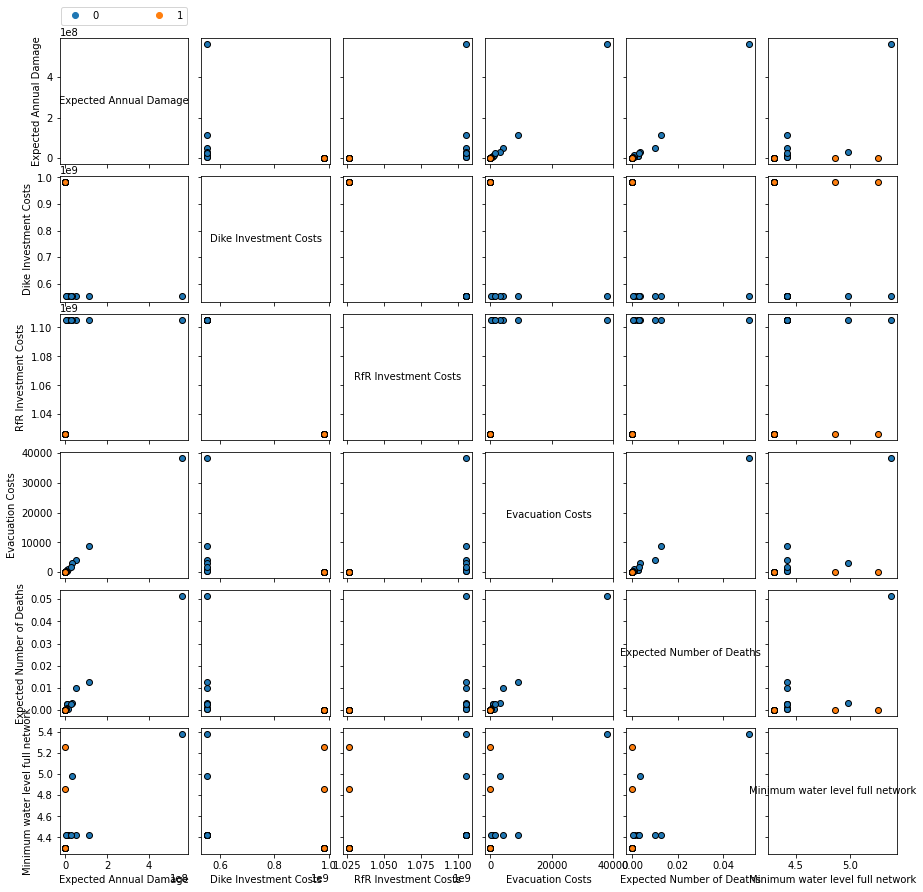

In [10]:
import matplotlib.pyplot as plt
fig, axes = pairs_plotting.pairs_scatter(results[0], results[1], group_by='policy',
                                         legend=True)
fig.set_size_inches(15,15)
plt.show()

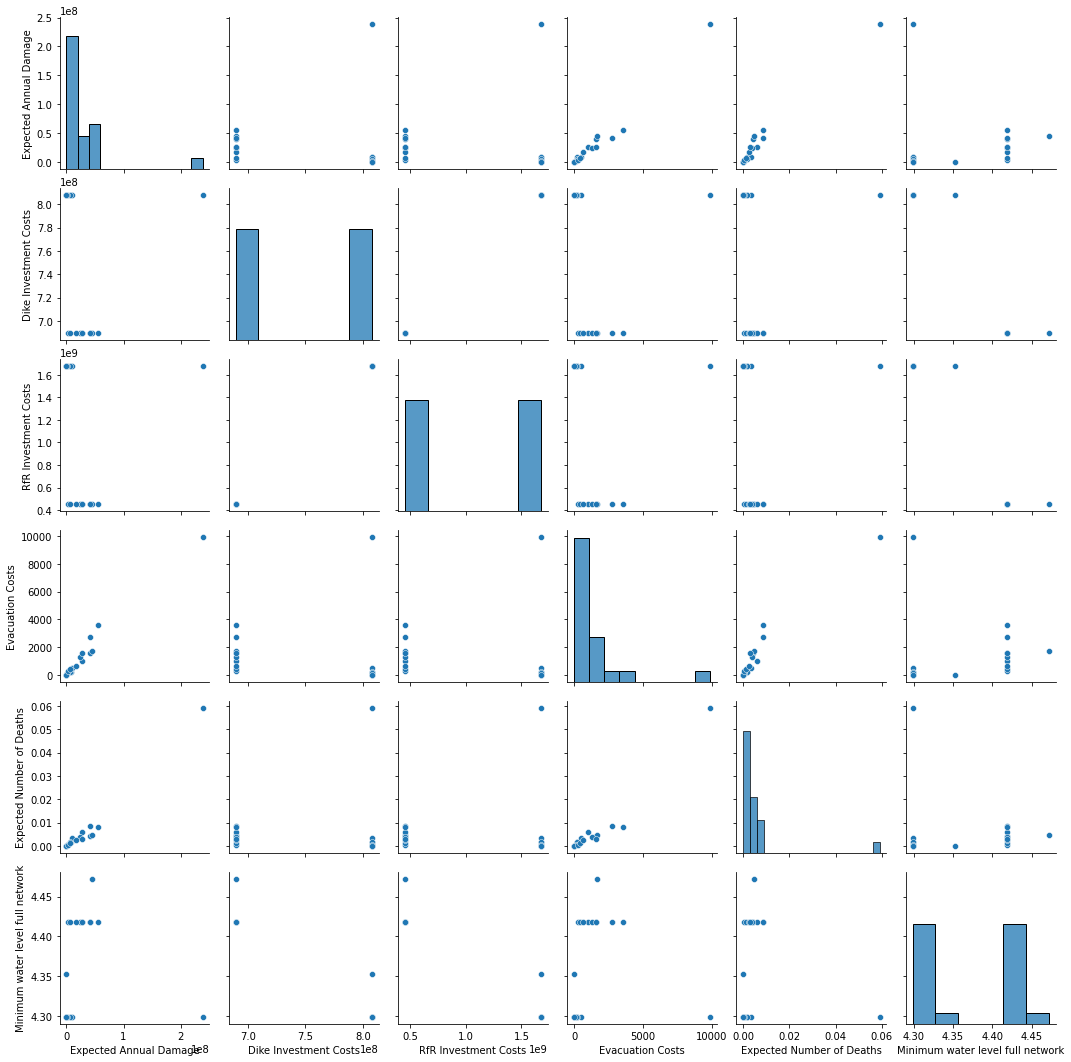

In [21]:
sns.pairplot(pd.DataFrame(results[1]))

In [11]:
scenarios = results[0]

In [12]:
scenarios_list1 = [Scenario(str(index), **row.to_dict()) for index, row in scenarios.iterrows()]

In [2]:
model, functions = get_model_for_problem_formulation(2)

In [3]:
import functools
import numpy as np


def robustness(direction, threshold, data):
    if direction == 'SMALLER':
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

Expected_Annual_Damage = functools.partial(robustness, 'SMALLER', 1*10**6)
Dike_Investment_Costs = functools.partial(robustness, 'SMALLER', 10*10**8)	
RfR_Investment_Costs = functools.partial(robustness, 'SMALLER', 1)	
Evacuation_Costs = functools.partial(robustness, 'SMALLER', 10000)	
Expected_Number_of_Deaths = functools.partial(robustness, 'SMALLER', 1)
Minimum_water_level_full_network = functools.partial(robustness, 'LARGER', 4)



In [4]:
# Defining robustnessfunctions for model

# Defining the robustness functions
robust = [ScalarOutcome('Expected_Damage', kind=ScalarOutcome.MAXIMIZE, variable_name='Expected Annual Damage',
                        function=Expected_Annual_Damage),
          ScalarOutcome('Dike_Costs', kind=ScalarOutcome.MAXIMIZE,variable_name='Dike Investment Costs',
                        function=Dike_Investment_Costs),
          ScalarOutcome('RfR_Costs', kind=ScalarOutcome.MAXIMIZE, variable_name='RfR Investment Costs', 
                        function=RfR_Investment_Costs),
          ScalarOutcome('Evacuation_Costs', kind=ScalarOutcome.MAXIMIZE, variable_name='Evacuation Costs',
                        function=Evacuation_Costs),
          ScalarOutcome('Number_of_Deaths', kind=ScalarOutcome.MAXIMIZE, variable_name='Expected Number of Deaths',
                        function=Expected_Number_of_Deaths),
          ScalarOutcome('wl', kind=ScalarOutcome.MAXIMIZE, variable_name='Minimum water level full network',
                        function=Minimum_water_level_full_network)   
          ]

In [5]:
convergence_metrics = [HyperVolume.from_outcomes(model.outcomes),
                       EpsilonProgress()]

In [8]:
ema_logging.log_to_stderr(ema_logging.INFO)
with MultiprocessingEvaluator(model) as evaluator:
    robust_results, convergence = evaluator.robust_optimize(robust, 
                                                    scenarios=50,
                                                    nfe = 1000,
                                                    epsilons=[100000, 100000, 100000, 100000, 10, 0.5],
                                                    convergence=convergence_metrics,
                                                    uncertainty_sampling='lhs')

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe


In [7]:
robust_results

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected_Damage,Dike_Costs,RfR_Costs,Evacuation_Costs,Number_of_Deaths,wl
0,0,0,0,1,1,0,1,0,1,1,...,10,1,8,0,1.0,1.0,0.0,1.0,1.0,1.0
